In [5]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
categories = ['talk.religion.misc','rec.sport.hockey', 'soc.religion.christian',
              'sci.space', 'comp.graphics','talk.politics.guns']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [24]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Confusion matrix is: 
[[336   5  12  28   8   0]
 [  0 392   1   6   0   0]
 [  5   1 358  22   8   0]
 [  1   0   5 392   0   0]
 [  1   0   3  10 350   0]
 [  3   4   8 164  30  42]]
Accuracy score is:  0.8519362186788155


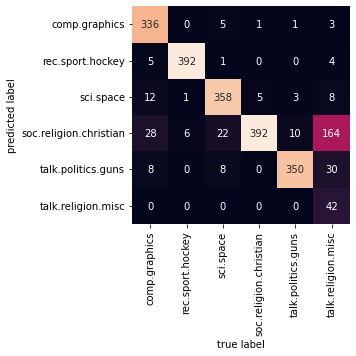

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
print("Confusion matrix is: ")
print(mat)
print("Accuracy score is: ",accuracy_score(labels,test.target))
plt.xlabel('true label')
plt.ylabel('predicted label');

In [27]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]
predict_category('Discussing about players')

'rec.sport.hockey'